**UNIVERSIDAD AUTÓNOMA DE NUEVO LEÓN**

 FACULTAD DE CIENCIAS FÍSICO MATEMÁTICAS


---


MAESTRÍA EN CIENCIAS DE DATOS

PROCESAMIENTO Y CLASIFICACIÓN DE DATOS

---


*1819111 LESLYE MARISOL HERNANDEZ BOLAÑOS*

### Objetivo

**Objetivo:**


Realizar un análisis estadístico sobre algún origen de datos textual (libros, publicaciones en redes sociales, entradas de blog, discursos políticos...) sobre dos o más fuentes de uno o más autores.

Analizar estadística descriptiva básica, frecuencias, distribuciones de palabras, n-gramas, uso de signos de puntuación, emojis...

Comparar las diversas fuentes y aventurar conclusiones a partir de los hallazgos en un reporte científico (de preferencia hecho en Latex; si no en Markdown como readme.md del repositorio).

Sube a tu repositorio el código utilizado en tu tarea y el reporte en PDF (y TEX si aplica) en una carpeta claramente identificada.




**Fuente de datos:** *The Project Gutenberg*  

- **Descripción:** The Project Gutenberg eBook of Little Women
- **Enlace:** https://www.gutenberg.org/cache/epub/514/pg514-images.html
- **Enfoque:** Analisis de texto

## Extracción


In [1]:
#Instalación de librerias externas
! pip install beautifulsoup4
! pip install requests
!pip install gutenbergpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 18.3 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=ade4af19e34ff887bf661ceb4435606d172a843aaedfc34e97d8626bdc17a957
  Stored in directory: /root/.cache/pip/wheels/1b/fa/c3/4c14e72101070c40b56c2bfb4617e510e68f121e4f736a5d2a
Successfully built httpsproxy-urllib2


In [2]:
import gutenbergpy.textget

In [3]:
#Función para obtener el libro "Little Women"
def obtener_libro(id = 514):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [4]:
#Extraemos el libro
libro_limpio, libro = obtener_libro()


Impresión de las primeras palabras del libro "Mujercitas"


In [5]:
print(libro[:100]) #Con encabezados
libro_limpio[:1000] #Sin encabezados

b'The Project Gutenberg eBook of Little Women, by Louisa May Alcott\r\n\r\nThis eBook is for the use of an'


b'\n\n\n\nLittle Women\n\nby Louisa May Alcott\n\n\nContents\n\n PART 1\n CHAPTER ONE PLAYING PILGRIMS\n CHAPTER TWO A MERRY CHRISTMAS\n CHAPTER THREE THE LAURENCE BOY\n CHAPTER FOUR BURDENS\n CHAPTER FIVE BEING NEIGHBORLY\n CHAPTER SIX BETH FINDS THE PALACE BEAUTIFUL\n CHAPTER SEVEN AMY\xe2\x80\x99S VALLEY OF HUMILIATION\n CHAPTER EIGHT JO MEETS APOLLYON\n CHAPTER NINE MEG GOES TO VANITY FAIR\n CHAPTER TEN THE P.C. AND P.O.\n CHAPTER ELEVEN EXPERIMENTS\n CHAPTER TWELVE CAMP LAURENCE\n CHAPTER THIRTEEN CASTLES IN THE AIR\n CHAPTER FOURTEEN SECRETS\n CHAPTER FIFTEEN A TELEGRAM\n CHAPTER SIXTEEN LETTERS\n CHAPTER SEVENTEEN LITTLE FAITHFUL\n CHAPTER EIGHTEEN DARK DAYS\n CHAPTER NINETEEN AMY\xe2\x80\x99S WILL\n CHAPTER TWENTY CONFIDENTIAL\n CHAPTER TWENTY-ONE LAURIE MAKES MISCHIEF, AND JO MAKES PEACE\n CHAPTER TWENTY-TWO PLEASANT MEADOWS\n CHAPTER TWENTY-THREE AUNT MARCH SETTLES THE QUESTION\n\n PART 2\n CHAPTER TWENTY-FOUR GOSSIP\n CHAPTER TWENTY-FIVE THE FIRST WEDDING\n CHAPTER TWENTY-SI

Tipo de dato

In [6]:
type(libro_limpio)

bytes

Descodificamos el texto

In [7]:
str_libro = libro_limpio.decode()
#str_libro[]

Separación del texto

In [8]:
list_libro = str_libro.split("\n")
list_libro[:20]

['',
 '',
 '',
 '',
 'Little Women',
 '',
 'by Louisa May Alcott',
 '',
 '',
 'Contents',
 '',
 ' PART 1',
 ' CHAPTER ONE PLAYING PILGRIMS',
 ' CHAPTER TWO A MERRY CHRISTMAS',
 ' CHAPTER THREE THE LAURENCE BOY',
 ' CHAPTER FOUR BURDENS',
 ' CHAPTER FIVE BEING NEIGHBORLY',
 ' CHAPTER SIX BETH FINDS THE PALACE BEAUTIFUL',
 ' CHAPTER SEVEN AMY’S VALLEY OF HUMILIATION',
 ' CHAPTER EIGHT JO MEETS APOLLYON']

In [9]:
libro_fil = list(filter(None, list_libro))
libro_fil[:20]

['Little Women',
 'by Louisa May Alcott',
 'Contents',
 ' PART 1',
 ' CHAPTER ONE PLAYING PILGRIMS',
 ' CHAPTER TWO A MERRY CHRISTMAS',
 ' CHAPTER THREE THE LAURENCE BOY',
 ' CHAPTER FOUR BURDENS',
 ' CHAPTER FIVE BEING NEIGHBORLY',
 ' CHAPTER SIX BETH FINDS THE PALACE BEAUTIFUL',
 ' CHAPTER SEVEN AMY’S VALLEY OF HUMILIATION',
 ' CHAPTER EIGHT JO MEETS APOLLYON',
 ' CHAPTER NINE MEG GOES TO VANITY FAIR',
 ' CHAPTER TEN THE P.C. AND P.O.',
 ' CHAPTER ELEVEN EXPERIMENTS',
 ' CHAPTER TWELVE CAMP LAURENCE',
 ' CHAPTER THIRTEEN CASTLES IN THE AIR',
 ' CHAPTER FOURTEEN SECRETS',
 ' CHAPTER FIFTEEN A TELEGRAM',
 ' CHAPTER SIXTEEN LETTERS']

## Análisis exploratorio



In [10]:
type(libro_fil)

list

## Estadistíca descriptiva

In [11]:
len(libro_fil)


16504

In [12]:
# Longitud de cada texto
import pandas as pd
df_libro_fil=pd.DataFrame( libro_fil, columns=['text'])


In [19]:
#Gráfico ¿Cuáles productos contienen más palabras?
from collections import Counter
# Eliminar etiquetas HTML y stopwords
import re
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Tokenizar palabras

def eliminar_stop_words(text):
    # Eliminar etiquetas HTML usando expresiones regulares
    text_sin_html = re.sub(r'<br\s*/?>|<p.*?>|</?\w+>', '', text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    palabras = word_tokenize(text_sin_html.lower())  # Tokenizar el texto limpio
    palabras_filtradas = [palabra for palabra in palabras if palabra.isalnum() and palabra.lower() not in stop_words]

    return ' '.join(palabras_filtradas)

df_libro_fil['processed_text'] = df_libro_fil['text'].fillna('').astype(str).apply(eliminar_stop_words)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


##Lematización

In [15]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
import nltk
from nltk.stem import PorterStemmer
from collections import Counter

# Descargar recursos de NLTK (si es necesario)
nltk.download('punkt')

# Inicializar el stemmer
stemmer = PorterStemmer()

# Texto de ejemplo
texto = " ".join(df_libro_fil['processed_text'][50:])

# Tokenizar el texto
palabras = nltk.word_tokenize(texto)

# Aplicar stemming a las palabras
stems = [stemmer.stem(word) for word in palabras if word.isalnum()]

# Contar la frecuencia de las raíces
frecuencia_stems = Counter(stems)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Fecuencia stemming

In [21]:
import nltk
from nltk.stem import PorterStemmer
from collections import Counter

# Descargar recursos de NLTK (si es necesario)
nltk.download('punkt')

# Inicializar el stemmer
stemmer = PorterStemmer()

# Texto de ejemplo
texto = " ".join(df_libro_fil['processed_text'][50:])

# Tokenizar el texto
palabras = nltk.word_tokenize(texto)

# Aplicar stemming a las palabras
stems = [stemmer.stem(word) for word in palabras if word.isalnum()]

# Contar la frecuencia de las raíces
frecuencia_stems = Counter(stems)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
# Mostrar la frecuencia de los stems
print("Frecuencia de stems:", frecuencia_stems)


Frecuencia de stems: Counter({'jo': 1356, 'said': 826, 'one': 748, 'littl': 722, 'like': 709, 'meg': 683, 'look': 680, 'ami': 648, 'lauri': 595, 'go': 570, 'beth': 464, 'would': 444, 'good': 441, 'say': 412, 'see': 393, 'mother': 391, 'love': 388, 'girl': 386, 'come': 380, 'time': 378, 'never': 375, 'much': 370, 'old': 362, 'could': 362, 'know': 356, 'ask': 350, 'make': 347, 'march': 344, 'well': 333, 'tri': 332, 'thing': 330, 'away': 327, 'think': 319, 'get': 319, 'hand': 303, 'face': 292, 'made': 292, 'day': 289, 'home': 280, 'young': 279, 'came': 271, 'went': 268, 'dear': 264, 'long': 263, 'take': 261, 'feel': 261, 'got': 255, 'shall': 247, 'eye': 244, 'thought': 243, 'seem': 243, 'heart': 240, 'tell': 239, 'put': 238, 'help': 233, 'way': 233, 'want': 228, 'cri': 228, 'boy': 227, 'laugh': 217, 'word': 215, 'head': 210, 'happi': 201, 'let': 200, 'work': 198, 'till': 190, 'turn': 190, 'alway': 189, 'great': 186, 'call': 182, 'quit': 182, 'us': 181, 'though': 181, 'ladi': 180, 'new': 1

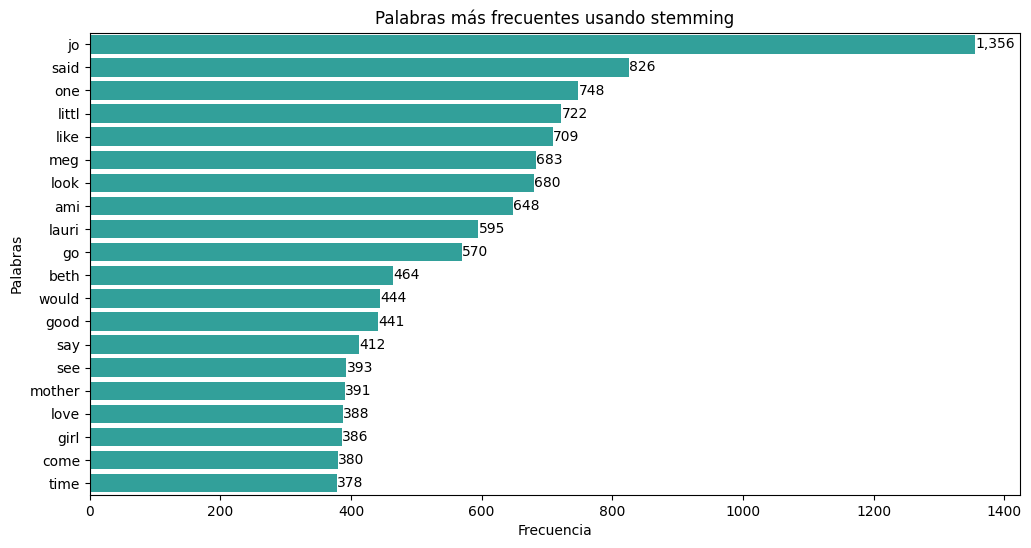

In [23]:
#Histograma de frecuencias de frecuencia_stems top 20
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
frecuencia_stems_top = dict(frecuencia_stems.most_common(20))
#plt.bar(frecuencia_stems_top.keys(), frecuencia_stems_top.values(), color='lightseagreen')
#plt.xlabel('Stems')
#plt.ylabel

#Convertir el diccinario en daata frame
frecuencia_stems_top_df = pd.DataFrame(list(frecuencia_stems_top.items()), columns=['stem', 'frequency'])



import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Gráfica de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=frecuencia_stems_top_df, x='frequency', y='stem', color='lightseagreen')

# Agregar los conteos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',  # Añadir formato con separación de miles
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

# Título y etiquetas
plt.title('Palabras más frecuentes usando stemming')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')

# Mostrar la gráfica
plt.show()

## Frecuencia usando Lematización

In [24]:
import spacy
from collections import Counter

# Cargar el modelo en inglés de spaCy
nlp = spacy.load("en_core_web_sm")

# Texto de ejemplo
texto = " ".join(df_libro_fil['processed_text'][50:])

# Procesar el texto con spaCy
doc = nlp(texto)

# Lematizar las palabras y contar las frecuencias
lemas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
frecuencia_lemmas = Counter(lemas)

# Mostrar la frecuencia de las lemas
print("Frecuencia de lemas:", frecuencia_lemmas)


Frecuencia de lemas: Counter({'jo': 1356, 'say': 956, 'little': 722, 'like': 698, 'meg': 683, 'look': 662, 'amy': 648, 'come': 602, 'laurie': 595, 'good': 554, 'go': 513, 'know': 498, 'think': 471, 'beth': 464, 'mother': 391, 'girl': 386, 'old': 384, 'time': 371, 'tell': 362, 'feel': 360, 'ask': 350, 'march': 331, 'thing': 330, 'away': 327, 'get': 321, 'try': 317, 'love': 316, 'hand': 296, 'face': 292, 'young': 289, 'day': 289, 'find': 285, 'home': 277, 'dear': 275, 'take': 260, 'long': 259, 'shall': 247, 'eye': 243, 'heart': 239, 'way': 233, 'boy': 226, 'cry': 224, 'want': 223, 'begin': 223, 'help': 221, 'well': 219, 'see': 219, 'word': 215, 'give': 210, 'laugh': 210, 'head': 207, 'sit': 207, 'great': 203, 'let': 199, 'man': 197, 'work': 197, 'leave': 192, 'till': 190, 'happy': 186, 'turn': 185, 'lady': 179, 'new': 178, 'friend': 175, 'father': 174, 'wish': 174, 'mind': 171, 'child': 170, 'poor': 164, 'john': 163, 'hope': 158, 'minute': 157, 'people': 157, 'hard': 153, 'hear': 151, 's

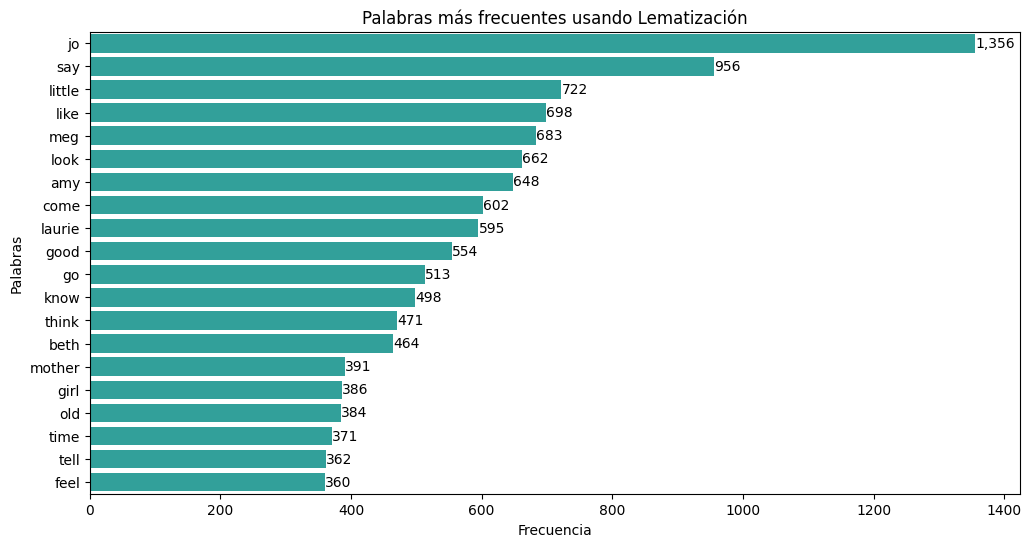

In [25]:
frecuencia_lemmas_top = dict(frecuencia_lemmas.most_common(20))
#plt.bar(frecuencia_stems_top.keys(), frecuencia_stems_top.values(), color='lightseagreen')
#plt.xlabel('Stems')
#plt.ylabel

#Convertir el diccinario en daata frame
frecuencia_lemmas_top_df = pd.DataFrame(list(frecuencia_lemmas_top.items()), columns=['lem', 'frequency'])



import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Gráfica de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=frecuencia_lemmas_top_df, x='frequency', y='lem', color='lightseagreen')

# Agregar los conteos a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width()):,}',  # Añadir formato con separación de miles
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                fontsize=10, color='black')

# Título y etiquetas
plt.title('Palabras más frecuentes usando Lematización')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')

# Mostrar la gráfica
plt.show()